In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.random as random

In [21]:
color_map = {"s": "blue", "i": "red", "r": "gray", "e": "orange"}
options = {
    "node_size": 100,
    "arrowstyle": "-|>",
    "arrowsize": 12
}

In [22]:
alpha = 0.25
beta = 0.50
gamma = 0.50
omega = 0.50
N = 10
random.seed(3)

In [23]:
G = nx.connected_caveman_graph(3, N)
for i in range(len(G.nodes)):
    G.nodes[i]["group"] = "s"
G.nodes[0]["group"] = "i"
G.nodes[0]["recovery_time_left"] = 1
G.nodes.data()

NodeDataView({0: {'group': 'i', 'recovery_time_left': 1}, 1: {'group': 's'}, 2: {'group': 's'}, 3: {'group': 's'}, 4: {'group': 's'}, 5: {'group': 's'}, 6: {'group': 's'}, 7: {'group': 's'}, 8: {'group': 's'}, 9: {'group': 's'}, 10: {'group': 's'}, 11: {'group': 's'}, 12: {'group': 's'}, 13: {'group': 's'}, 14: {'group': 's'}, 15: {'group': 's'}, 16: {'group': 's'}, 17: {'group': 's'}, 18: {'group': 's'}, 19: {'group': 's'}, 20: {'group': 's'}, 21: {'group': 's'}, 22: {'group': 's'}, 23: {'group': 's'}, 24: {'group': 's'}, 25: {'group': 's'}, 26: {'group': 's'}, 27: {'group': 's'}, 28: {'group': 's'}, 29: {'group': 's'}})

In [24]:
for node in G.nodes.data():
    if node[1]["group"] == "i":
        # All other nodes are suspected to be infected!
        for other_node in G.neighbors(node[0]):
            G[node[0]][other_node]["weight"] = beta
G.edges.data()

EdgeDataView([(0, 2, {'weight': 0.5}), (0, 3, {'weight': 0.5}), (0, 4, {'weight': 0.5}), (0, 5, {'weight': 0.5}), (0, 6, {'weight': 0.5}), (0, 7, {'weight': 0.5}), (0, 8, {'weight': 0.5}), (0, 9, {'weight': 0.5}), (0, 29, {'weight': 0.5}), (1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (3, 4, {}), (3, 5, {}), (3, 6, {}), (3, 7, {}), (3, 8, {}), (3, 9, {}), (4, 5, {}), (4, 6, {}), (4, 7, {}), (4, 8, {}), (4, 9, {}), (5, 6, {}), (5, 7, {}), (5, 8, {}), (5, 9, {}), (6, 7, {}), (6, 8, {}), (6, 9, {}), (7, 8, {}), (7, 9, {}), (8, 9, {}), (9, 10, {}), (10, 12, {}), (10, 13, {}), (10, 14, {}), (10, 15, {}), (10, 16, {}), (10, 17, {}), (10, 18, {}), (10, 19, {}), (11, 12, {}), (11, 13, {}), (11, 14, {}), (11, 15, {}), (11, 16, {}), (11, 17, {}), (11, 18, {}), (11, 19, {}), (12, 13, {}), (12, 14, {}), (12, 15, {}), (12, 16, {}), (12, 17, {}), (12, 18, {}), (12, 19

In [25]:
G_over_time = []

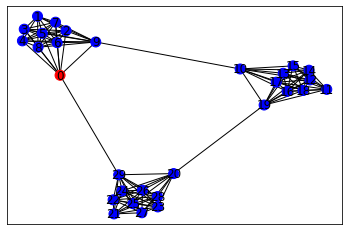

In [26]:
def plot_G(G):
    pos=nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G, pos, node_color = [color_map[G.nodes[i]["group"]] for i in G], **options)
plot_G(G)

In [27]:
nx.adjacency_matrix(G).todense()

matrix([[0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0.5],
        [0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0.

In [8]:
def infect_neighbors(G):
    for node in G.nodes.data():
        if node[1]["group"] == "e" and node[1]["expose_time_left"] != 1:

            # Gives a chance to be infected with all neighbors
            for neighbor in G.neighbors(node[0]):
                if G.nodes[neighbor]["group"] == "s" and random.rand() < alpha:

                    # neighbor got infected :(
                    G[node[0]][neighbor]["weight"] = 0
                    G.nodes[neighbor]["group"] = "e"
                    G.nodes[neighbor]["expose_time_left"] = 1

                    # Updates the neighbors
                    for infected_neighbor in G.neighbors(neighbor):
                        if G.nodes[infected_neighbor]["group"] == "s":
                            G[neighbor][infected_neighbor]["weight"] = alpha


        if node[1]["group"] == "i" and node[1]["recovery_time_left"] != 1:
            
            # Gives a chance to be infected with all neighbors
            for neighbor in G.neighbors(node[0]):
                if G.nodes[neighbor]["group"] == "s" and random.rand() < beta:
                    # neighbor got infected :(
                    G[node[0]][neighbor]["weight"] = 0
                    G.nodes[neighbor]["group"] = "e"
                    G.nodes[neighbor]["expose_time_left"] = 1

                    # Updates the neighbors
                    for infected_neighbor in G.neighbors(neighbor):
                        if G.nodes[infected_neighbor]["group"] == "s":
                            G[neighbor][infected_neighbor]["weight"] = beta

def recover_infected(G):
    for node in G.nodes.data():

        if node[1]["group"] == "e":
            # Add to the exposed rate
            node[1]["expose_time_left"] -= omega
            
            # Checks if they are infected
            if node[1]["expose_time_left"] < 0:
                # They are infeected
                node[1]["group"] = "i"
                node[1]["recovery_time_left"] = 1

                # Updates all of the neighbors
                for neighbor in G.neighbors(node[0]):
                    G[node[0]][neighbor]["weight"] = 0

        if node[1]["group"] == "i":
            # Add to the recovery rate
            node[1]["recovery_time_left"] -= gamma
            
            # Checks if they have recovered
            if node[1]["recovery_time_left"] < 0:
                # They are recovered
                node[1]["group"] = "r"

                # Updates all of the neighbors
                for neighbor in G.neighbors(node[0]):
                    G[node[0]][neighbor]["weight"] = 0

for i in range(20): 

    # Infect new individuals
    infect_neighbors(G)

    # See which infected get recovered
    recover_infected(G)

    G_over_time.append(G.copy())

MovieWriter ffmpeg unavailable; using Pillow instead.


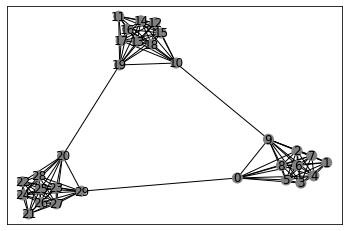

In [9]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
pos=nx.spring_layout(G_over_time[0])
def animate(i):
    ax.clear()
    curr_G = G_over_time[i]
    nx.draw_networkx(curr_G, pos, node_color = [color_map[curr_G.nodes[i]["group"]] for i in curr_G], **options, ax = ax)
ani = FuncAnimation(fig, animate, frames = len(G_over_time), interval = 1000)
HTML(ani.to_jshtml())
ani.save('tmp.gif')

In [16]:
mat = nx.adjacency_matrix(G_over_time[1]).todense()
mat

matrix([[0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0.5],
        [0. , 0. , 0.5, 1. , 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 1. , 0.5, 0. , 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0. , 0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 1. , 0.5, 1. , 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0.